In [24]:
import mxnet as mx
from mxnet import ndarray as nd
from mxnet import gluon
from mxnet import autograd
import sys
sys.path.append("..")
import utils
import matplotlib.pyplot as plt
num_inputs=200
num_train = 20
num_test = 100

In [25]:
#read data
true_w = nd.ones((num_inputs, 1)) * 0.01
true_b = 0.05
batch_size=5

X=nd.random.normal(shape=(num_train+num_test,num_inputs))
y = nd.dot(X, true_w)
y += .01 * nd.random.normal(shape=y.shape)


X_train,X_test=X[:num_train,:],X[num_train:,:]
y_train,y_test=y[:num_train,:],y[num_train:,:]

dataset_train=gluon.data.ArrayDataset(X_train, y_train)
data_iter_train=gluon.data.DataLoader(dataset_train, batch_size, shuffle=True)

In [26]:
#intialization parameters
def init_params():
    w=nd.random_normal(scale=1,shape=(num_inputs,1))
    b=nd.zeros(shape=(1,))
    params=[w,b]
    for param in params:
        param.attach_grad()
    return params

In [27]:
# define cost function
square_loss = gluon.loss.L2Loss()

In [32]:
#define net function
def test(net, X, y):
    return square_loss(net(X), y).mean().asscalar()

def train(weight_decay):
    epochs = 10
    learning_rate = 0.005
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.collect_params().initialize(mx.init.Normal(sigma=1))

    trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':learning_rate,"wd":weight_decay})    
#training
    train_loss=[]
    test_loss=[]
    for e in range(epochs):
        for data,label in data_iter_train:
            with autograd.record():
                output=net(data)
                loss=square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
        train_loss.append(test(net,X_train,y_train))
        test_loss.append(test(net,X_test,y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train','test'])
    plt.show()
    
    return ('learned w[:10]:', net[0].weight.data()[:,:10],
            'learned b:', net[0].bias.data())
    
        
        
    
   
    

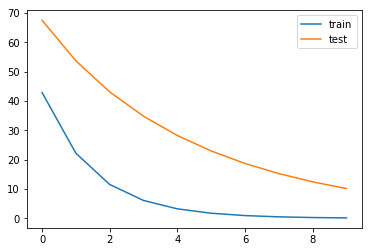

('learned w[:10]:', 
 [[-0.07819321 -0.18366896 -0.01929988 -0.35402918  0.14829843  0.5242244
   -0.00637099 -0.16559738 -0.25381443  0.8050195 ]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [ 0.01560239]
 <NDArray 1 @cpu(0)>)

In [33]:
train(5)